# CNN $\Rightarrow$ Feature Extractor + Classifier
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/21-1.png" style="max-width: 60%; height: auto;"> <p>

---
- 이미지를 분류하기 위해서 사용되는 <b>일반적인 컨볼루션 신경망 (CNN) 구조는 특징 추출기 (Feature Extractor)와 분류기 (Classifier)</b>가 합쳐진 형태   
- <b>특징 추출기 (Feature Extractor)</b>는 컨볼루션층 (Cone Layer)와 풀링층 (Pool Layer)의 다양한 조합으로 구성, 이미지 데이터의 특징을 추출하고 압출하는 역할   
- <b>분류기 (Classifier)</b>부분은 완전연결층, Dense Layer와 과적합(overfitting)을 방지하기 위한 Dropout Layer등 다양한 조합으로 구성, 정답을 분류하는 역할
--- 

# TensorFlow  CNN API - Conv Layer, Pool Layer
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/21-2.png" style="max-width: 60%; height: auto;"> <p>
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/21-3.png" style="max-width: 60%; height: auto;"> <p>


# Tensorflow version 2.0.0 사용

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()   # 데이터 불러오기 

x_train=x_train.reshape(-1, 28, 28, 1)   # 텐서로 변환 ( -1, 높이, 너비, 채널)
x_test=x_test.reshape(-1, 28, 28, 1)     # 텐서로 변환 ( -1, 높이, 너비, 채널)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0  # 정규화 
x_test = x_test.astype(np.float32) / 255.0    # 정규화 

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/21-5.png" style="max-width: 60%; height: auto;"> <p>


In [13]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3),
               filters=32, activation='relu', padding='valid'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))      # 은닉층 
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))    # 출력층 

# Loss function
---
- <code>sparse_categorical_crossentropy</code>는 딥러닝 및 머신러닝에서 사용되는 손실 함수 중 하나. 
- 이 함수는 주로 다중 클래스 분류 문제에서 사용. 
- <code>categorical_crossentropy</code>와 유사하지만, <b>입력 데이터의 레이블이 원-핫 인코딩이 아니라 정수 형태</b>로 제공될 때 사용.
> 클래스 레이블이 정수로 표현되는 경우   
> 클래스 수가 많아서 원-핫 인코딩으로 변환하기 어려운 경우   
---

In [5]:
import pandas as pd

DF=pd.DataFrame(y_train) # 정답(레이블)값이 정수. 
DF.head()

,0
0,5
1,0
2,4
3,1
4,9


# Filter
---
- gray_scale이므로 마지막 차원(채절)이 1이고, $28 \times 28 \times 1$ 의 input feature map. (RGB 3가지 색상인경우 마지막 차원은 3)  
- 필터는 여러 개의 커널 묶음이고, <code>필터 하나 당 한 개의 feature map</code>을 출력함.
- <b>첫번째 conv2D layer</b>의 경우
> - 32개의 filter 수를 가지고 있기 때문에, output feature map의 개수가 32개   
> - 즉,<code>필터의 개수 == 출력 feature map</code>의 개수   
> - 또한, <code>padding 설정이 안 되어있으므로</code> default로 <code>padding = 'valid'</code>   
>   $\rightarrow$ 커널 사이즈가 <code>3X3</code>이므로 <code>28X28에서 26X26으로 줄어듦</code>    
> - Param은 커널 사이즈가 $3 \times 3$이므로, <code>3X3X32개의 파라미터</code>와 <code>32개의 bias 파라미터</code>를 더하여 <code>320개</code>가 됨.
> - pooling 사이즈가 $2 \times 2$이므로, <code>24X24에서 12X12으로 줄어듦</code>
- <b>두번째 conv2D layer</b>를 살펴볼면...
> - 커널 사이즈가 3X3이므로 26X26에서 24X24으로 줄어듦.   
> - 또한, 64개의 filter를 가지고 있어서, 총 <code>26X26X64의 출력 feature map</code>으로 구성됨.   
> - 그렇다면, param의 개수는 <code>3X3X32X64 + 64 이므로 18496개</code>. (3X3 커널 사이즈 * 32개의 커널 * 64개 filter + 64개 bias)   
> - 참고로, filter 하나 당 bias가 하나

---

In [11]:
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              


<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/21-4.png" style="max-width: 60%; height: auto;"> <p>


In [12]:
hist = cnn.fit(x_train, y_train, batch_size=128, 
               epochs=30, validation_data=(x_test, y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 189s 3ms/sample - loss: 0.1618 - accuracy: 0.9518 - val_loss: 0.0496 - val_accuracy: 0.9839
Epoch 2/30
60000/60000 [==============================] - 187s 3ms/sample - loss: 0.0792 - accuracy: 0.9771 - val_loss: 0.0340 - val_accuracy: 0.9888
Epoch 3/30
60000/60000 [==============================] - 186s 3ms/sample - loss: 0.0632 - accuracy: 0.9809 - val_loss: 0.0345 - val_accuracy: 0.9892
Epoch 4/30
60000/60000 [==============================] - 185s 3ms/sample - loss: 0.0524 - accuracy: 0.9839 - val_loss: 0.0292 - val_accuracy: 0.9903
Epoch 5/30
60000/60000 [==============================] - 185s 3ms/sample - loss: 0.0461 - accuracy: 0.9858 - val_loss: 0.0303 - val_accuracy: 0.9906
Epoch 6/30
60000/60000 [==============================] - 186s 3ms/sample - loss: 0.0384 - accuracy: 0.9877 - val_loss: 0.0278 - val_accuracy: 0.9920
Epoch 7/30
60000/60000 [==========================

In [14]:
cnn.evaluate(x_test, y_test,verbose=2)

10000/1 - 13s - loss: 0.0152 - accuracy: 0.9938


[0.03047175886622282, 0.9938]

In [15]:
import pandas as pd

history_DF=pd.DataFrame(hist.history)
history_DF

,loss,accuracy,val_loss,val_accuracy
0,0.161784,0.951833,0.049573,0.9839
1,0.079195,0.977067,0.033979,0.9888
2,0.063205,0.980883,0.034540,0.9892
3,0.052400,0.983933,0.029201,0.9903
4,0.046051,0.985817,0.030271,0.9906
5,0.038362,0.987733,0.027760,0.9920
6,0.033074,0.989617,0.028445,0.9906
7,0.031768,0.989867,0.028757,0.9919
8,0.027532,0.991350,0.023801,0.9936
9,0.025861,0.991750,0.025209,0.9927


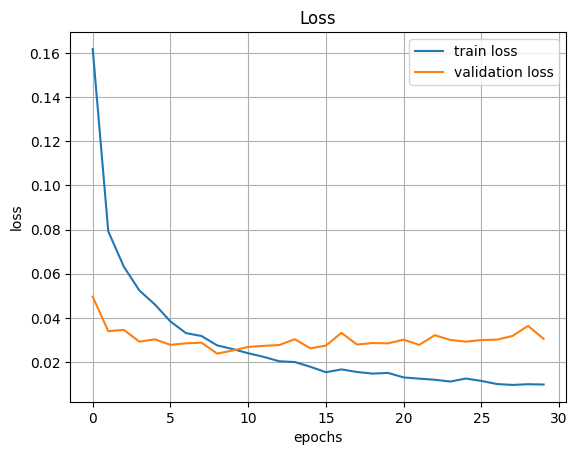

In [18]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

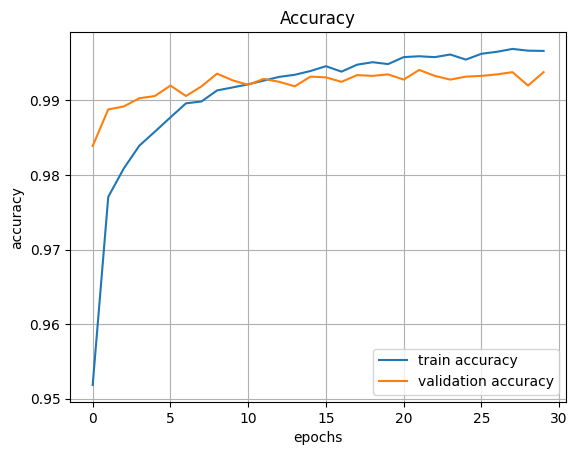

In [19]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()